In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [19]:
# The QuantStudio outputs some calculated results, which is helpful. Just printing a subset of them here.
results = pd.read_excel('data/051920/AF-TaqPath QuantStudio3 10 uL_Results_20200519 220404.xlsx', sheet_name='Data',
                        # Convert undetermined to NaN so that Cq comes as a float. 
                        na_values='Undetermined')
cols = ['Well', 'Well Position', 'Sample', 'Cq', 'Cq Confidence', 'Cq Mean', 'Cq SD', 'copies_per_ul']

sample_names = results['Sample'].values
max_conc = 1e5
sample_conc_dict = {'neg': 0, 'max': max_conc, 
                    '1e-1': max_conc*0.1, 
                    '1e-2': max_conc*1e-2,
                    '1e-3': max_conc*1e-3,
                    '1e-4': max_conc*1e-4,
                    '1e-5': max_conc*1e-5,
                   }

sample_concs = [sample_conc_dict[s] for s in sample_names]
results['copies_per_ul'] = sample_concs
results[cols]

,Well,Well Position,Sample,Cq,Cq Confidence,Cq Mean,Cq SD,copies_per_ul
0,1,A1,neg,NaN,0.000000,NaN,NaN,0.0
1,2,A2,neg,NaN,0.000000,NaN,NaN,0.0
2,3,A3,neg,NaN,0.000000,NaN,NaN,0.0
3,13,B1,max,17.737145,0.988917,17.766461,0.298998,100000.0
4,14,B2,max,18.079037,0.983244,17.766461,0.298998,100000.0
5,15,B3,max,17.483201,0.985794,17.766461,0.298998,100000.0
6,25,C1,1e-1,21.600156,0.989688,22.059167,0.501410,10000.0
7,26,C2,1e-1,22.594277,0.990334,22.059167,0.501410,10000.0
8,27,C3,1e-1,21.983069,0.991072,22.059167,0.501410,10000.0
9,37,D1,1e-2,23.681032,0.991040,25.175236,1.482884,1000.0


/usr/local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


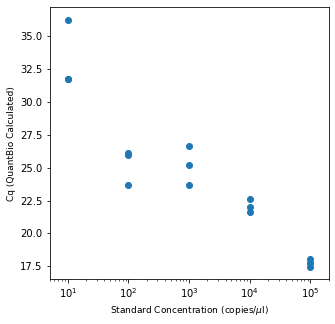

In [28]:
plt.figure(figsize=(5,5))
plt.xscale('log')
mask = np.logical_and(results.copies_per_ul > 0,
                      results.Cq != 'Undetermined')
sub_df = results[results.copies_per_ul > 0]
plt.scatter(sub_df.copies_per_ul, sub_df.Cq)
plt.xlabel('Standard Concentration (copies/$\mu$l)', fontsize=9)
plt.ylabel('Cq (QuantBio Calculated)', fontsize=9)
plt.xlim(5, 2e5)
plt.show()

In [29]:
# Load the underlying data to make a simple plot
data_df = pd.read_excel('data/051920/AF-TaqPath QuantStudio3 10 uL_Amplification Data_20200519 220404.xlsx', sheet_name='Data')
samples = sorted(data_df['Sample'].unique())
pal = sns.color_palette('dark')
cmap = dict((s, pal[i]) for i, s in enumerate(samples))

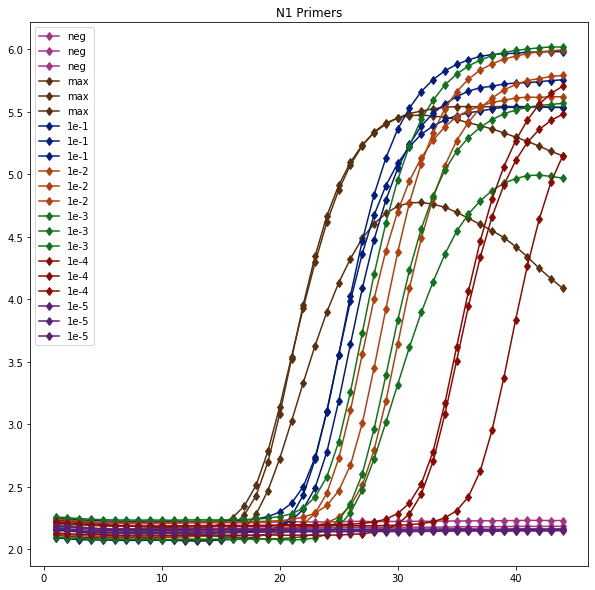

In [31]:
fig = plt.figure(figsize=(10,10))


grouped = data_df.groupby('Well')
for wid, wdf in grouped:
    s = wdf['Sample'].values[0] 
    c = cmap.get(s)
    plt.plot(wdf['Cycle Number'], wdf['Rn'], color=c, marker='d', label=s)
    
plt.legend()
plt.title('N1 Primers', fontsize=12)
plt.show()